<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#turn-synthetic-csv-into-networkx" data-toc-modified-id="turn-synthetic-csv-into-networkx-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>turn synthetic csv into networkx</a></span></li></ul></div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.community as nx_comm
import re
import streamlit as st
import matplotlib.pyplot as plt
import tempfile
import pptx
from pptx.util import Inches

In [2]:
G = nx.read_gml('synthetic_mm.gml')

In [23]:
number_of_edges=3
for i in range(1, number_of_edges + 1):
    print(i)

1
2
3


In [30]:
def split_graph_by_distance(graph, node_id, number_of_edges=3):
    """
    Given a node id and a graph, this function returns two graph objects:
    - one graph object with nodes connected 1 edge away from the given node_id
    - a second graph object with nodes connected 2 to 5 edges away from the given node_id

    :param graph: A NetworkX graph object
    :param node_id: The node id for which the graph objects need to be created
    :return: A tuple containing the two graph objects (one_edge_away, two_to_five_edges_away)
    """

    # Initialize the two graph objects
    one_edge_away = nx.Graph()
    two_to_n_edges_away = nx.Graph()
    # Iterate through 1 to 5 edges away from the given node_id
    for i in range(1, number_of_edges + 1):
        # Get the nodes at the current distance (i) from the given node_id
        current_level_nodes = nx.single_source_shortest_path_length(graph, node_id, cutoff=i)
        current_level_nodes = {node: dist for node, dist in current_level_nodes.items() if dist == i}
        # If the current distance is 1, add nodes and edges to the one_edge_away grap
    # If the current distance is 1, add nodes and edges to the one_edge_away graph
        if i == 1:
            one_edge_away.add_nodes_from([(node, graph.nodes[node]) for node in current_level_nodes])
            one_edge_away.add_edges_from([(node_id, neighbor) for neighbor in current_level_nodes])
        elif 1 < i <= number_of_edges:
            two_to_n_edges_away.add_nodes_from([(node, graph.nodes[node]) for node in current_level_nodes])
            two_to_n_edges_away.add_edges_from([(node_id, neighbor) for neighbor in current_level_nodes])
    return one_edge_away, two_to_n_edges_away

In [19]:
i = 3
current_level_nodes = nx.single_source_shortest_path_length(G, 'cf774c62-c401-3eba-af07-758e5431196a', cutoff=i)
{node: dist for node, dist in current_level_nodes.items() if dist == i}

{'66e1f0bc-0933-32c2-86ed-6e3ef02458e5': 3,
 '03b89440-3dc5-3c6e-b54f-b5f80c6f9058': 3,
 '01f6c0f6-3498-374d-9b4e-0ad2464421fb': 3,
 '7c3aba63-b0d1-3842-8bb9-3815921ff367': 3,
 '9fb02f5e-9242-3761-a9a8-fa330328e65e': 3,
 'debbc92a-ec26-3496-9fb8-fd961a5ff0e0': 3,
 '668f2ee2-2f6a-37f1-8743-eb12e5d89917': 3,
 '7a8a5756-e00c-337a-b18e-c298ea460283': 3,
 '2328f2d1-4b03-3652-be73-5d02ee7d6449': 3,
 'd166888f-a7a3-310a-b0f8-8bf615403f71': 3,
 '1913cc82-5a7f-3b7e-882e-d1ec644b613a': 3,
 '053fa3ad-c9d8-3eac-9c11-f59894ac0d25': 3,
 'fb8c56fc-5b26-310d-8d91-8b43bb23b094': 3,
 '78f32b5a-19d2-30cd-b322-6e46bc3fc3a8': 3,
 'c8e9cd79-26f8-396a-aadf-d0fb77b1c176': 3,
 '967df021-9e5f-3cbd-9e3e-008adde2aff1': 3,
 'b8a67d07-ce6a-365f-a975-cd27434a53a6': 3,
 '7e9639ac-ec8a-3755-9124-f1e37139e3c4': 3,
 '51b9fa78-ffeb-3684-93bc-29e9f0df0fe4': 3,
 'a67b50e8-f36a-3b53-aa72-fce2fb0fd8a9': 3,
 '12f56b23-d6e9-3c15-8a51-92a478f4523e': 3,
 '661b4a69-fbc4-3de8-9436-9dda13e25e5d': 3,
 'cfed6b75-d634-3303-bbfc-1a28a8

In [32]:
one_edge, two_edge=split_graph_by_distance(G, 'cf774c62-c401-3eba-af07-758e5431196a', number_of_edges = 2)

In [33]:
{node: attrs for node, attrs in two_edge.nodes(data=True)}

{'57f27019-9799-3cd6-946e-d691fce996ae': {'table': 'vessel',
  'guid': '57f27019-9799-3cd6-946e-d691fce996ae',
  'raw_source': 'gt',
  'name': 'Jordan Ball',
  'call_sign': 'X4A9F',
  'code': 'Xwas5ZbC9y',
  'flag': 'GA',
  'imo_number': '2536725.0',
  'vessel_owner': 'Mccall-Rice'},
 '2f061ab9-6c35-3c27-9b37-77e016652093': {'table': 'account',
  'guid': '2f061ab9-6c35-3c27-9b37-77e016652093',
  'raw_source': 'bsa',
  'account_number': '183075020.0',
  'account_type': 'IBAN',
  'account_maximum_value_amount': '2211.0',
  'joint_owner_quantity': '2.0'},
 'fb8d4967-3fcf-3981-90f6-ab865f6edb5b': {'table': 'ip_address',
  'guid': 'fb8d4967-3fcf-3981-90f6-ab865f6edb5b',
  'raw_source': 'bsa',
  'ip_address': '33.109.169.66',
  'isp': 'Jordan, Garcia and Thomas'},
 '2c81eaa5-8919-3f06-852f-50e9b0aec6b9': {'table': 'vessel',
  'guid': '2c81eaa5-8919-3f06-852f-50e9b0aec6b9',
  'raw_source': 'gt',
  'name': 'Keith Hill',
  'call_sign': '1n7Ke',
  'code': 'jFObVTmQRP',
  'flag': 'BR',
  'imo_num

In [3]:
from streamlit_agraph import Node, Edge
def nx_to_agraph_nodes_edges(graph):
    nodes = []
    edges = []

    for node, attrs in graph.nodes(data=True):
        # You can customize the node attributes, size, and shape here
        nodes.append(Node(id=node, label=attrs.get('label', node), size=25, shape="circle"))

    for source, target, attrs in graph.edges(data=True):
        # You can customize the edge attributes and label here
        edges.append(Edge(source=source, target=target, label=attrs.get('label', '')))

    return nodes, edges

In [4]:
nx_to_agraph_nodes_edges(G)

([<streamlit_agraph.node.Node at 0x12cbee66f90>,
  <streamlit_agraph.edge.Edge at 0x12cbf292ad0>])

In [11]:
G.number_of_nodes()

150

In [12]:
G.number_of_edges()

263

In [115]:
def save_graph_to_ppt(graph, ppt_file = None):
    # Draw the graph and save it as an image
    plt.figure()
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, node_size=50)
#     nx.draw_networkx_edge_labels(graph, pos)

    with tempfile.NamedTemporaryFile(suffix='.png', delete=False) as temp_file:
        plt.savefig(temp_file.name, format='PNG', dpi=300)
        temp_file.flush()

        # Create a PowerPoint presentation or load an existing one
        if ppt_file:
            presentation = pptx.Presentation(ppt_file)
        else:
            presentation = pptx.Presentation()

        # Add a new slide to the presentation
        slide_layout = presentation.slide_layouts[5]
        slide = presentation.slides.add_slide(slide_layout)

        # Add the graph image to the slide
        slide.shapes.add_picture(temp_file.name, Inches(0), Inches(1), width=Inches(10))

        # Save the presentation
        presentation.save(ppt_file if ppt_file else 'graph_presentation.pptx')

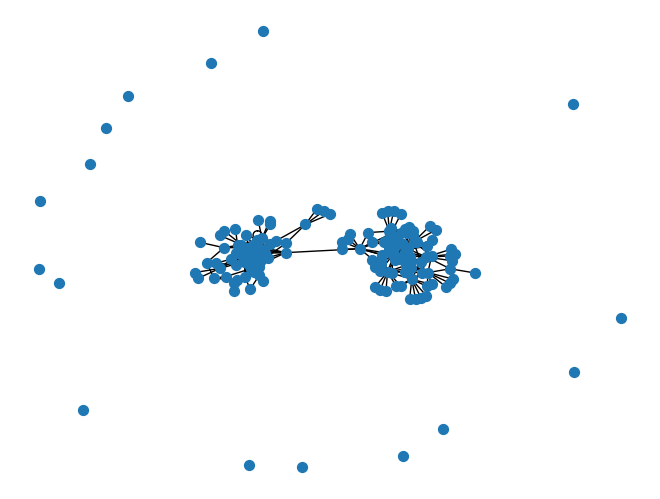

In [116]:
save_graph_to_ppt(G)

In [130]:
def draw_graph_with_highlighted_node(graph, node_ids, highlight_color='red', node_size=40):
    """
    Draw a NetworkX graph with a highlighted node.

    Parameters:
    graph (networkx.Graph): The NetworkX graph to be drawn.
    node_ids (list of str): a list containing all ID of the nodes to be highlighted.
    highlight_color (str, optional): The color for highlighting the node. Default is 'red'.
    node_size (int, optional): The size of the nodes in the graph. Default is 2000.

    Returns:
    None
    """
    pos = nx.spring_layout(graph)

    # Draw all nodes except the highlighted one
    non_highlighted_nodes = [node for node in graph.nodes() if node not in node_ids]
    nx.draw_networkx_nodes(graph, pos, nodelist=non_highlighted_nodes, node_size=node_size)

    # Draw the highlighted node
    nx.draw_networkx_nodes(graph, pos, nodelist=node_ids, node_color=highlight_color, node_size=node_size * 1.5,
                           linewidths=3)

    # Draw the edges and labels
    nx.draw_networkx_edges(graph, pos)
    plt.show()

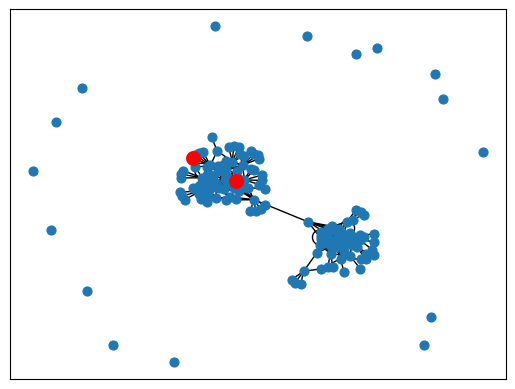

In [131]:
draw_graph_with_highlighted_node(G, ['df9d0887-346b-380f-a3c6-8766f81199eb', '51b9fa78-ffeb-3684-93bc-29e9f0df0fe4'])

In [27]:
def find_nodes_with_attr(G, attr_value):
    """
    Given a networkx graph G and a string variable attr_value,
    return the nodes in the graph that have an attribute with a value equal to attr_value.
    """
    matching_nodes = []
    for node in G.nodes:
        node_attrs = G.nodes[node]
        for attr in node_attrs:
            if node_attrs[attr] == attr_value:
                matching_nodes.append(node)
                break
    return matching_nodes

In [29]:
def get_subgraph_within_n_steps(G, node_id, n):
    """
    Given a networkx graph G and a node ID, return the subgraph that includes
    all nodes within 3 hops of the target node.
    """
    subgraph_nodes = set()
    nodes_to_check = [node_id]
    for i in range(n):
        next_nodes = set()
        for node in nodes_to_check:
            if node not in subgraph_nodes:
                subgraph_nodes.add(node)
                next_nodes.update(G.neighbors(node))
        nodes_to_check = list(next_nodes)
    return G.subgraph(subgraph_nodes)

In [31]:
n_hops_graph=get_subgraph_within_n_steps(G, 'df9d0887-346b-380f-a3c6-8766f81199eb', 3)

In [134]:
from pyvis.network import Network
import networkx as nx

def interactive_subgraph(graph, selected_nodes):
    # Initialize the Pyvis network
    net = Network(notebook=True,cdn_resources='in_line')
    net.toggle_physics(False)

    # Add nodes and edges to the Pyvis network
    for node, attrs in graph.nodes(data=True):
        if node in selected_nodes:
            net.add_node(node, **attrs, color="red")
        else:
            net.add_node(node, **attrs)
    for edge in graph.edges():
        net.add_edge(*edge)

    # Show the interactive network
    net.show("interactive_subgraph.html")

def main():
    # Create a sample graph
    G = nx.Graph()
    G.add_node(1, address="123 Main St", phone="5551234")
    G.add_node(2, address="456 Market St", phone="5555678")
    G.add_node(3, address="789 Elm St", phone="5552468")
    G.add_edge(1, 2, relation="friends")
    G.add_edge(1, 3, relation="neighbors")

    # Define the initial subgraph (e.g., nodes found from a previous search)
    selected_nodes = [1, 2]

    # Show the interactive subgraph
    interactive_subgraph(G, selected_nodes)
main()

interactive_subgraph.html


UnicodeEncodeError: 'charmap' codec can't encode characters in position 263607-263621: character maps to <undefined>

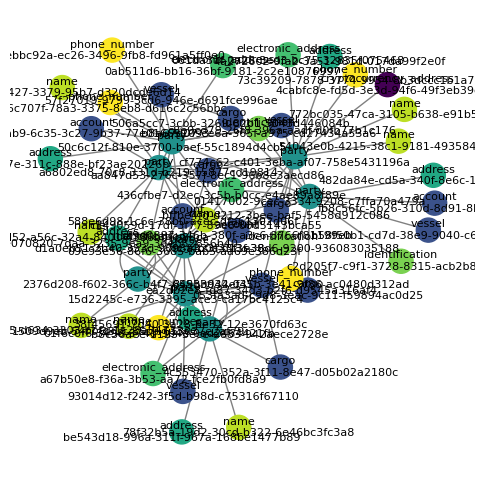

In [35]:
color_map = [val_map.get(attributes['table'], 0.25) for node, attributes in n_hops_graph.nodes(data=True)]

#dictionary with nodes as keys and table as the value
node_table_labels = {node: attributes['table'] + '\n' + attributes['guid']
                     for node, attributes in n_hops_graph.nodes(data=True)}

pos = nx.spring_layout(n_hops_graph, k=0.15, iterations=20, seed=42)
fig, ax = plt.subplots(figsize=(6, 6))
nx.draw(n_hops_graph, pos=pos, ax=ax, with_labels=True, labels = node_table_labels, font_size=8, cmap=plt.get_cmap('viridis'),
        node_color=color_map, edge_color='gray')

In [53]:
def get_attr_dict(G, attr_name):
    """
    Given a networkx graph G and an attribute name, return a dictionary
    that includes the value found, the "raw source" key value, and the node ID
    where the attribute was found.
    """
    attr_dict = {}
    for node_id, attrs in G.nodes(data=True):
        if attr_name in attrs:
#             attr_value = attrs[attr_name]
            attr_dict[node_id] = {'raw_source': attrs['raw_source'], attr_name: attrs[attr_name]}
    return attr_dict

In [54]:
get_attr_dict(G, 'address')

{'4cabfc8e-fd5d-3e3d-94f6-49f3eb39ed7f': {'raw_source': 'ca',
  'address': '1MqizdU7oKhvnPUVa4HRfAFySbt2vTUZTA'},
 '7bf69433-1dab-3543-b96d-e224379f5cfa': {'raw_source': 'ca',
  'address': 'J8BYnnEJ2i3EPZYbBupfcnQX3XSkSUjvzoO'},
 '15928ce5-2b09-316e-9162-5ec0a4b52f12': {'raw_source': 'ca',
  'address': 'ZXUqqvZnt6FPv3PbVmMIstIrTUFwabVxCgN'},
 '12f56b23-d6e9-3c15-8a51-92a478f4523e': {'raw_source': 'ca',
  'address': 'HCJhuquw5GRqm27qDlQyT1ZNuWSLl3ZyQtt'},
 '49205104-164f-3873-af5e-d8151688ae31': {'raw_source': 'ca',
  'address': '8xbOgjNKJtLvIJ4eDRn0EYAidL0sSjJyxde'},
 '6b7ae965-1a4f-3fc9-89a2-31758087e9dc': {'raw_source': 'ca',
  'address': 'PSPAzjrSQGHO50tJhYQgebgsq886ED9frts'},
 '368ca0c7-befc-33bf-8855-32351323b909': {'raw_source': 'ca',
  'address': 'xosd4XU0M1q6SPORk7x0UMwisAw0Luatb7m'},
 '0da0851d-237c-35ea-87a9-aa41582d9d93': {'raw_source': 'ca',
  'address': 'QOY268CHXuqkUzvujbOTwmDcGe90lBbq3OW'},
 '8cf65b2a-d9ea-3ae6-be2e-fd78dea130bc': {'raw_source': 'ca',
  'address': 'zcN9Q

In [50]:
for node_id, attrs in G.nodes(data=True):
    if 'address' in attrs:
        print(attrs)

{'address': '1MqizdU7oKhvnPUVa4HRfAFySbt2vTUZTA', 'table': 'cryptocurrency_address', 'asset': 'BTC', 'root_address': 'k5ElqrWo89xmvzWP3YgkzUmnpVUQ1v5njV3', 'guid': '4cabfc8e-fd5d-3e3d-94f6-49f3eb39ed7f', 'raw_source': 'ca', 'category': 'nan', 'deposits': 'nan', 'fees': 'nan', 'fees_usd': 'nan', 'first_activity': 'nan', 'last_activity': 'nan', 'name': 'nan', 'received': 'nan', 'received_usd': 'nan', 'sent': 'nan', 'sent_usd': 'nan', 'withdrawals': 'nan', 'city': 'nan', 'country': 'nan', 'latitude': 'nan', 'longitude': 'nan', 'geo_coordinates': 'nan', 'ip_address': 'nan', 'anonymous': 'nan', 'isp': 'nan', 'text': 'nan', 'url': 'nan', 'party_type': 'nan', 'citizenship': 'nan', 'nationality': 'nan', 'gender': 'nan', 'date_of_birth': 'NaT', 'address_type': 'nan', 'full_address': 'nan', 'party_address_type': 'nan', 'state': 'nan', 'street_address1': 'nan', 'stree_address2': 'nan', 'zip_code': 'nan', 'electronic_address': 'nan', 'electronic_address_type': 'nan', 'issuer_country_id': 'nan', 'i

In [46]:
for node_id, attrs in A.nodes(data=True):
    print(attrs['attr_dict'])
#         print(attrs)

{'raw_source': 'ca', 'phone_number': 770434483}
{'raw_source': 'bsa'}
{'raw_source': 'gt'}
{'raw_source': 'ca', 'phone_number': 770434483}


In [98]:
address_dict=get_attr_dict(G, 'street_address1')

In [96]:
def display_data(node_data):
    """
    Given a dictionary of node data, display the values and sources in a streamlit app.
    :param node_data:
    :return:
    """
    for node_id, attributes in node_data.items():
        # st.write(f"Node ID: {node_id}")
        print(f"Node ID: {node_id}")
        for attribute, value in attributes.items():
            # st.write(f"{attribute}: {value}")
            print(f"{attribute}: {value}")  

In [102]:
def search_network(graph, query):
    matching_nodes = []
    for node, attrs in graph.nodes(data=True):
        for attr, value in attrs.items():
            if re.search(query, str(value), re.IGNORECASE):
                matching_nodes.append(node)
                break
    return matching_nodes
search_network(G, 'Davis Spring')

['cddb5f32-d12c-3846-8720-c60712839f6b']

In [99]:
display_data(address_dict)

Node ID: cddb5f32-d12c-3846-8720-c60712839f6b
raw_source: bsa
street_address1: 90396 Davis Spring
Node ID: 4a272602-9fa2-3a51-981d-017da99f2e0f
raw_source: bsa
street_address1: 82654 Jessica Orchard
Node ID: 03b89440-3dc5-3c6e-b54f-b5f80c6f9058
raw_source: bsa
street_address1: 829 Jacob Groves
Node ID: 38f45691-7d40-3a28-8e32-12e3670fd63c
raw_source: bsa
street_address1: 7861 Brown Place
Node ID: 37850423-907e-311c-888e-bf23ae20226b
raw_source: sayari
street_address1: 43601 Fisher Track
Node ID: be543d18-996a-311f-967a-168be1477b89
raw_source: ofac
street_address1: 426 Tucker Ports Suite 208
Node ID: 1e070820-7daa-3235-9ea9-3deb82856b40
raw_source: ofac
street_address1: 2801 Shannon Mills Apt. 805
Node ID: 1cd5231d-07b0-3b28-9eea-ce0d1deecb09
raw_source: sayari
street_address1: 199 Fox Throughway
Node ID: 482da84e-cd5a-340f-8e6c-1ac08906c2fa
raw_source: ofac
street_address1: 455 Andrew Dam Apt. 734
Node ID: d166888f-a7a3-310a-b0f8-8bf615403f71
raw_source: gt
street_address1: 945 Holly 

In [39]:
A = nx.Graph()
A.add_node(1, attr_dict={'raw_source':'ca', 'phone_number':770434483})
A.add_node(2, attr_dict={'raw_source':'bsa'})
A.add_node(3, attr_dict={'raw_source':'gt'})
A.add_node(4, attr_dict={'raw_source':'ca', 'phone_number':770434483})

# call the function to get a dictionary of 'color' attributes
color_dict = get_attr_dict(A, 'phone_number')

# print the resulting dictionary
print(color_dict)

{}


In [3]:
list(G.neighbors('cf774c62-c401-3eba-af07-758e5431196a'))

['df9d0887-346b-380f-a3c6-8766f81199eb',
 '588e6d98-1c6c-38b0-acec-dfa61302d06f',
 '4a272602-9fa2-3a51-981d-017da99f2e0f',
 '061da31f-0a25-3ed3-bc75-32835f075468',
 '798a323f-d13f-38d6-9200-936083035188',
 '772bc035-47ca-3105-b638-e91b509f3fb5',
 '54043e0b-4215-38c1-9181-493584dd4495',
 '73c39209-7878-3774-9954-8b3dccc1b1a7',
 'a6802ed8-70c8-331d-b219-15877cd19814',
 'bffbe4fd-d212-3bee-baf5-5458d912c086',
 'aa847d53-276c-357f-8ec1-96b8e3aecd86',
 'ea2db2e8-fd87-34d3-b2f6-d9545a316af4']

In [34]:
val_map = {'cryptocurrency_address': 0,
'cryptocurrency_cluster':.10,
'location':.20,
'ip_address':.3,
'osints':.4,
'party':.5,
'address':.6,
'electronic_address':.7,
'identification':.8,
'name':.9,
'phone_number':1
# 'account':,
# 'activity':,
# 'cargo':,
# 'vessel':,
}

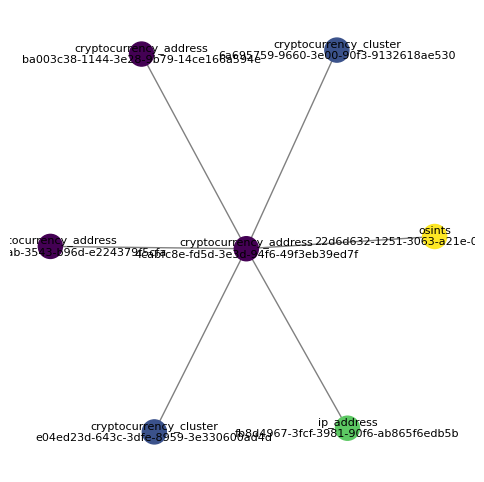

In [10]:
subgraph = nx.ego_graph(G, '4cabfc8e-fd5d-3e3d-94f6-49f3eb39ed7f', radius=1)
color_map = [val_map.get(attributes['table'], 0.25) for node, attributes in subgraph.nodes(data=True)]

#dictionary with nodes as keys and table as the value
node_table_labels = {node: attributes['table'] + '\n' + attributes['guid']
                     for node, attributes in subgraph.nodes(data=True)}

pos = nx.spring_layout(subgraph, k=0.15, iterations=20, seed=42)
fig, ax = plt.subplots(figsize=(6, 6))
nx.draw(subgraph, pos=pos, ax=ax, with_labels=True, labels = node_table_labels, font_size=8, cmap=plt.get_cmap('viridis'),
        node_color=color_map, edge_color='gray')

In [55]:
G.nodes['09e93e56-86f6-3685-bab5-aa69e386d23f']

{'address': 'nan',
 'table': 'party',
 'asset': 'nan',
 'root_address': 'nan',
 'raw_source': 'gt',
 'category': 'nan',
 'deposits': 'nan',
 'fees': 'nan',
 'fees_usd': 'nan',
 'first_activity': 'nan',
 'last_activity': 'nan',
 'name': 'nan',
 'received': 'nan',
 'received_usd': 'nan',
 'sent': 'nan',
 'sent_usd': 'nan',
 'withdrawals': 'nan',
 'city': 'nan',
 'country': 'nan',
 'latitude': 'nan',
 'longitude': 'nan',
 'geo_coordinates': 'nan',
 'ip_address': 'nan',
 'anonymous': 'nan',
 'isp': 'nan',
 'text': 'nan',
 'url': 'nan',
 'party_type': 'AGENT',
 'citizenship': 'Iceland',
 'nationality': 'Ukraine',
 'gender': 'M',
 'date_of_birth': '1990-06-24 23:50:14',
 'address_type': 'nan',
 'full_address': 'nan',
 'party_address_type': 'nan',
 'state': 'nan',
 'street_address1': 'nan',
 'stree_address2': 'nan',
 'zip_code': 'nan',
 'electronic_address': 'nan',
 'electronic_address_type': 'nan',
 'issuer_country_id': 'nan',
 'issuer_state_id': 'nan',
 'other_issuer_country': 'nan',
 'othe

In [53]:
character_name = '09e93e56-86f6-3685-bab5-aa69e386d23f'

In [54]:
sorted(G[character_name], key=lambda x: G.degree(x), reverse=True)[:10]

['50c6c12f-810e-3700-baef-55c1894d4cb5',
 'b8c56aee-1123-3ece-a683-942aece2728e',
 '48aa8e3e-dc0c-36f8-9d7a-7546ba7cb4d2',
 '588e6d98-1c6c-38b0-acec-dfa61302d06f',
 'c149059d-17df-3f77-89e6-60d5143bca55',
 'bffbe4fd-d212-3bee-baf5-5458d912c086',
 'aa847d53-276c-357f-8ec1-96b8e3aecd86',
 '1e070820-7daa-3235-9ea9-3deb82856b40',
 '436cfbe7-d2ec-3c5b-b0cc-e4ae89a8f89e',
 '1509d9eb-54f7-381c-85c9-613037e2af79']

In [46]:
connected_characters=sorted(G[character_name], key=lambda x: G.degree(x), reverse=True)[:5]
[G.nodes[c]['name'] for c in connected_characters if G.nodes[c]['name']!= 'nan']

['Jennifer Booker']

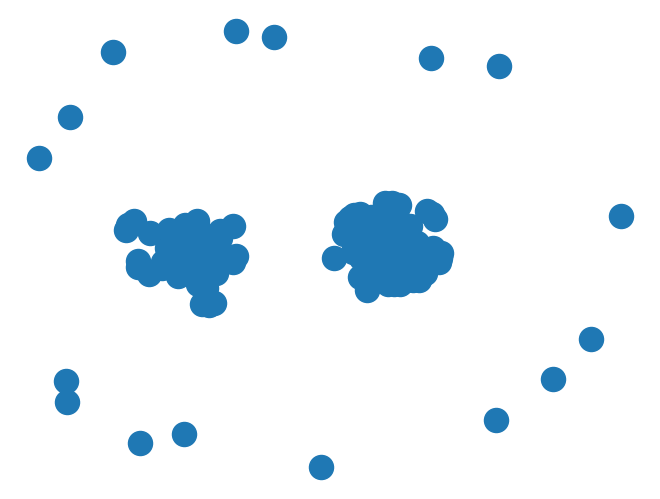

In [19]:
nx.draw(G)

In [52]:
max(dict(G.degree()).items(), key = lambda x : x[1])

('09e93e56-86f6-3685-bab5-aa69e386d23f', 16)

In [47]:
nodesresult = [x for x,y in G.nodes(data=True) if y['name']=='Keith Paul']
nodesresult

['e04ed23d-643c-3dfe-8959-3e330600ad4d']

In [51]:
name = 'Keith Paul'
graph = G
node_id= [x for x, y in G.nodes(data=True) if y['name'] == name][0]
connected_nodes = {}
    # Get the neighbors of the selected character
neighbors = list(graph.neighbors(node_id))
# Iterate through the neighbors to find their neighbors
for neighbor in neighbors:
    # Get the neighbors of the neighbor
    sub_neighbors = list(graph.neighbors(neighbor))
    # Remove the selected character from the list of sub-neighbors
    sub_neighbors.remove(node_id)
    # Add the sub-neighbors to the dictionary
    connected_nodes[neighbor] = sub_neighbors
print(neighbors)

['4cabfc8e-fd5d-3e3d-94f6-49f3eb39ed7f', 'c52eac7a-c60e-3d25-8cf9-2e996e9d6d72', 'c4e92011-9ca9-3e4d-93fd-156c11476d92', '668f2ee2-2f6a-37f1-8743-eb12e5d89917', '2328f2d1-4b03-3652-be73-5d02ee7d6449']


In [4]:
from faker import Faker
fake = Faker()
for i in range(20):
    print(fake.name())

Steven Yang
Daniel Johnson
Jose Miller
Brittany Snyder
Troy Hoffman
Thomas Olson
Joseph Robertson
Stephanie Ryan
Bianca Kim
Tara Robinson
Martha Jackson
Nicholas Cardenas
Rodney Meza
Matthew Parker
Michael Weber
Susan White
Natasha Nolan
Stacey Kim
Jennifer Jimenez
Melissa Weaver


# turn synthetic csv into networkx

In [87]:
df = pd.read_excel('synthetic_graph_data_small.xlsx')

#drop timestamp column
df = df.drop(columns=['timestamp','from_date',
                      'to_date',
                      'datetime',
                      'observationtime',
                      'datetime',
                      'filing_date'])

#cast all columns as string
df = df.astype(str)

# nx.write_gml(G, "synthetic_mm.gml")

In [88]:
def synthetic_to_graph(df):
    # df = pd.read_csv(file, low_memory=False)
    # split into edge and node types
    edge_pd = df[df['table_type'] == 'edge'].drop(columns=['table_type']).rename(
        columns={"from_id": "source", "to_id": "target"})
    node_pd = df[df['table_type'] != 'edge'].drop(columns=['table_type'])
    # get unique node and edge names
    edge_tables = edge_pd['table'].unique()
    node_tables = node_pd['table'].unique()
    # start graph and add in all nodes
    G = nx.Graph()
    G.add_nodes_from(node_pd['guid'].tolist())
    # add in edges with attributes
    for i in edge_tables:
        sub_df = edge_pd.loc[edge_pd['table'] == i]
        # sub_df = edge_pd.loc[edge_pd['table'] == i].dropna(axis=1, how='all')
        sub_df = sub_df.astype(str)
        H = nx.from_pandas_edgelist(sub_df, edge_attr=True)
        G = nx.compose(G, H)
    # add in node attributes
    for i in node_tables:
        sub_df = node_pd.loc[node_pd['table'] == i]
        # sub_df = node_pd.loc[node_pd['table'] == i].dropna(axis=1, how='all')
        sub_df = sub_df.astype(str)
        sub_dict = [v.dropna().to_dict() for k, v in sub_df.iterrows()]
        node_attr = dict(zip(sub_df['guid'].tolist(), sub_dict))
        nx.set_node_attributes(G, node_attr)

    return G, node_attr

In [89]:
def synthetic_to_graph(df):
    G = nx.Graph()
    for i, row in df.iterrows():
        if row['table_type'] == 'node':
            attributes = {}
            for col in df.columns:
                if pd.notna(row[col]) and row[col] != '' and row[col]!='nan'and row[col]!='NaT':
                    attributes[col] = row[col]
#             del attributes['table_type']
            G.add_node(row['guid'], **attributes)
        elif row['table_type'] == 'edge':
            attributes = {}
            for col in df.columns:
                if pd.notna(row[col]) and row[col] != '' and row[col]!='nan'and row[col]!='NaT':
                    attributes[col] = row[col]
#             del attributes['table_type']
#             del attributes['from_id']
#             del attributes['to_id']
            G.add_edge(row['from_id'], row['to_id'], **attributes)
    return G

In [90]:
G = synthetic_to_graph(df)

In [91]:
G.nodes(data=True)

NodeDataView({'cf774c62-c401-3eba-af07-758e5431196a': {'table': 'party', 'guid': 'cf774c62-c401-3eba-af07-758e5431196a', 'raw_source': 'bsa', 'name': 'Rodriguez Lopez Auto SAS', 'party_type': 'NOTIFY PARTY 2', 'citizenship': 'Antigua and Barbuda', 'nationality': 'Anguilla', 'gender': 'F', 'date_of_birth': '2018-12-07 09:11:15', 'table_type': 'node'}, '4cabfc8e-fd5d-3e3d-94f6-49f3eb39ed7f': {'address': '1MqizdU7oKhvnPUVa4HRfAFySbt2vTUZTA', 'table': 'cryptocurrency_address', 'asset': 'BTC', 'root_address': 'k5ElqrWo89xmvzWP3YgkzUmnpVUQ1v5njV3', 'guid': '4cabfc8e-fd5d-3e3d-94f6-49f3eb39ed7f', 'raw_source': 'ca', 'table_type': 'node'}, '7bf69433-1dab-3543-b96d-e224379f5cfa': {'address': 'J8BYnnEJ2i3EPZYbBupfcnQX3XSkSUjvzoO', 'table': 'cryptocurrency_address', 'asset': 'GRC', 'root_address': 'TVeC38s38jLsnNEtWzEvMaIlHCP0INtjA1z', 'guid': '7bf69433-1dab-3543-b96d-e224379f5cfa', 'raw_source': 'ca', 'table_type': 'node'}, '15928ce5-2b09-316e-9162-5ec0a4b52f12': {'address': 'ZXUqqvZnt6FPv3PbVmM